In [2]:
pip install great-expectations --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import os
#from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import mlflow
import great_expectations as gx
from great_expectations.profile.basic_dataset_profiler import BasicDatasetProfiler
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
'''drive.mount('/content/drive')
basepath = "/content/drive/MyDrive/MLOps/"
os.chdir(basepath)'''


'drive.mount(\'/content/drive\')\nbasepath = "/content/drive/MyDrive/MLOps/"\nos.chdir(basepath)'

In [5]:
# df = pd.read_csv('/Users/afonsoreyna/Desktop/MLOPS/Bank.csv')
#df = pd.read_csv('C:\Users\Samuel Santos\Documents\MDSAA-DS\MLOPS\GitHub\MLOPS\data\01_raw\Bank Marketing.csv')
df = pd.read_csv('C:/Users/Samuel Santos/Documents/MDSAA-DS/MLOPS/GitHub/MLOPS/data/01_raw/Bank Marketing.csv')

df

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1


In [6]:
df['Last Contact Month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [7]:
df['Subscription'].unique()

array([1, 2], dtype=int64)

In [16]:
import unit_test

#from  src.project_template.pipelines.data_unit_tests.nodes import unit_test
# import nodes.data_unit_tests.pipelines.project_template.src



ModuleNotFoundError: No module named 'unit_test'

In [ ]:
df.columns

Index(['Age', 'Job', 'Marital Status', 'Education', 'Credit',
       'Balance (euros)', 'Housing Loan', 'Personal Loan', 'Contact',
       'Last Contact Day', 'Last Contact Month', 'Last Contact Duration',
       'Campaign', 'Pdays', 'Previous', 'Poutcome', 'Subscription'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

In [ ]:
df.describe()

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,1.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


In [ ]:
df.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

In [67]:
#AFONSO

num = ["Age", "Balance (euros)", "Last Contact Day", "Last Contact Duration", "Campaign", "Pdays", "Previous"]
categ = ["Job", "Marital Status", "Education", "Credit", "Housing Loan", "Personal Loan", "Contact", "Last Contact Month","Poutcome"]

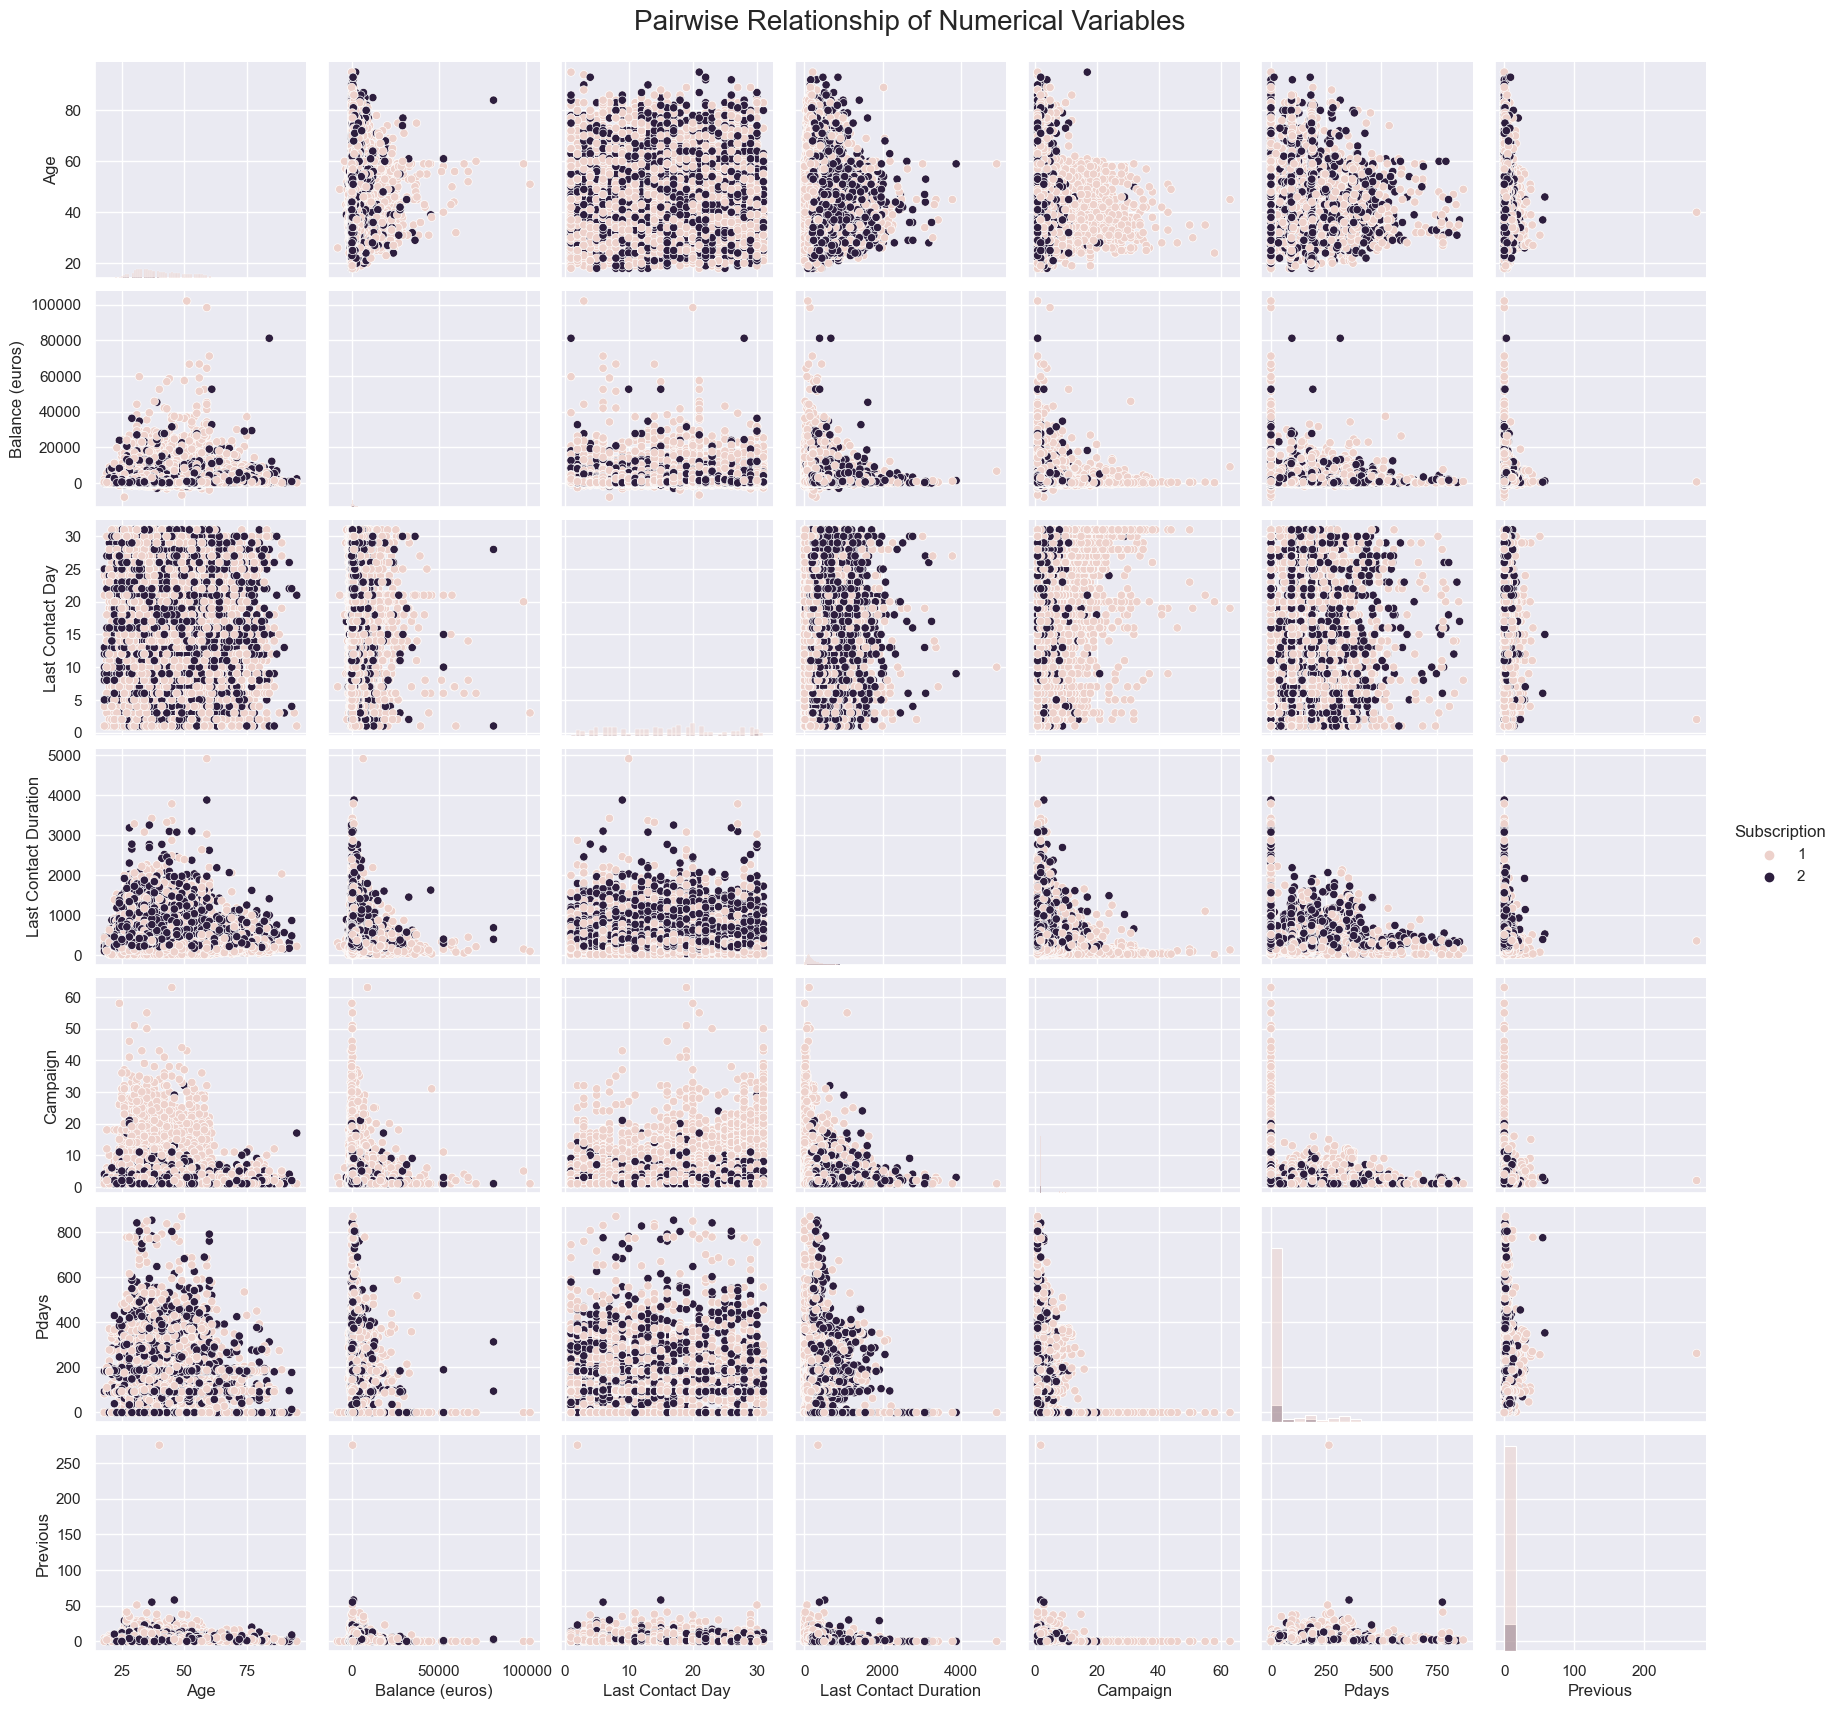

In [61]:
#AFONSO

# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(data = df[num+["Subscription"]], hue = "Subscription", diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

In [75]:
#AFONSO

def boxplot_wall(df):
    # All Numeric Variables' Box Plots in one figure
    sns.set()

    # Prepare figure. Create individual axes where each box plot will be placed
    fig, axes = plt.subplots(2, math.ceil(len(num) / 2), figsize=(20, 11))

    # Plot data
    # Iterate across axes objects and associate each box plot (hint: use the ax argument):
    for ax, feat in zip(axes.flatten(), df[num]): # Notice the zip() function and flatten() method
        sns.boxplot(x=df[feat], ax=ax)
        
    # Layout
    # Add a centered title to the figure:
    title = "Numeric Variables' Box Plots"

    plt.suptitle(title)

    plt.show()

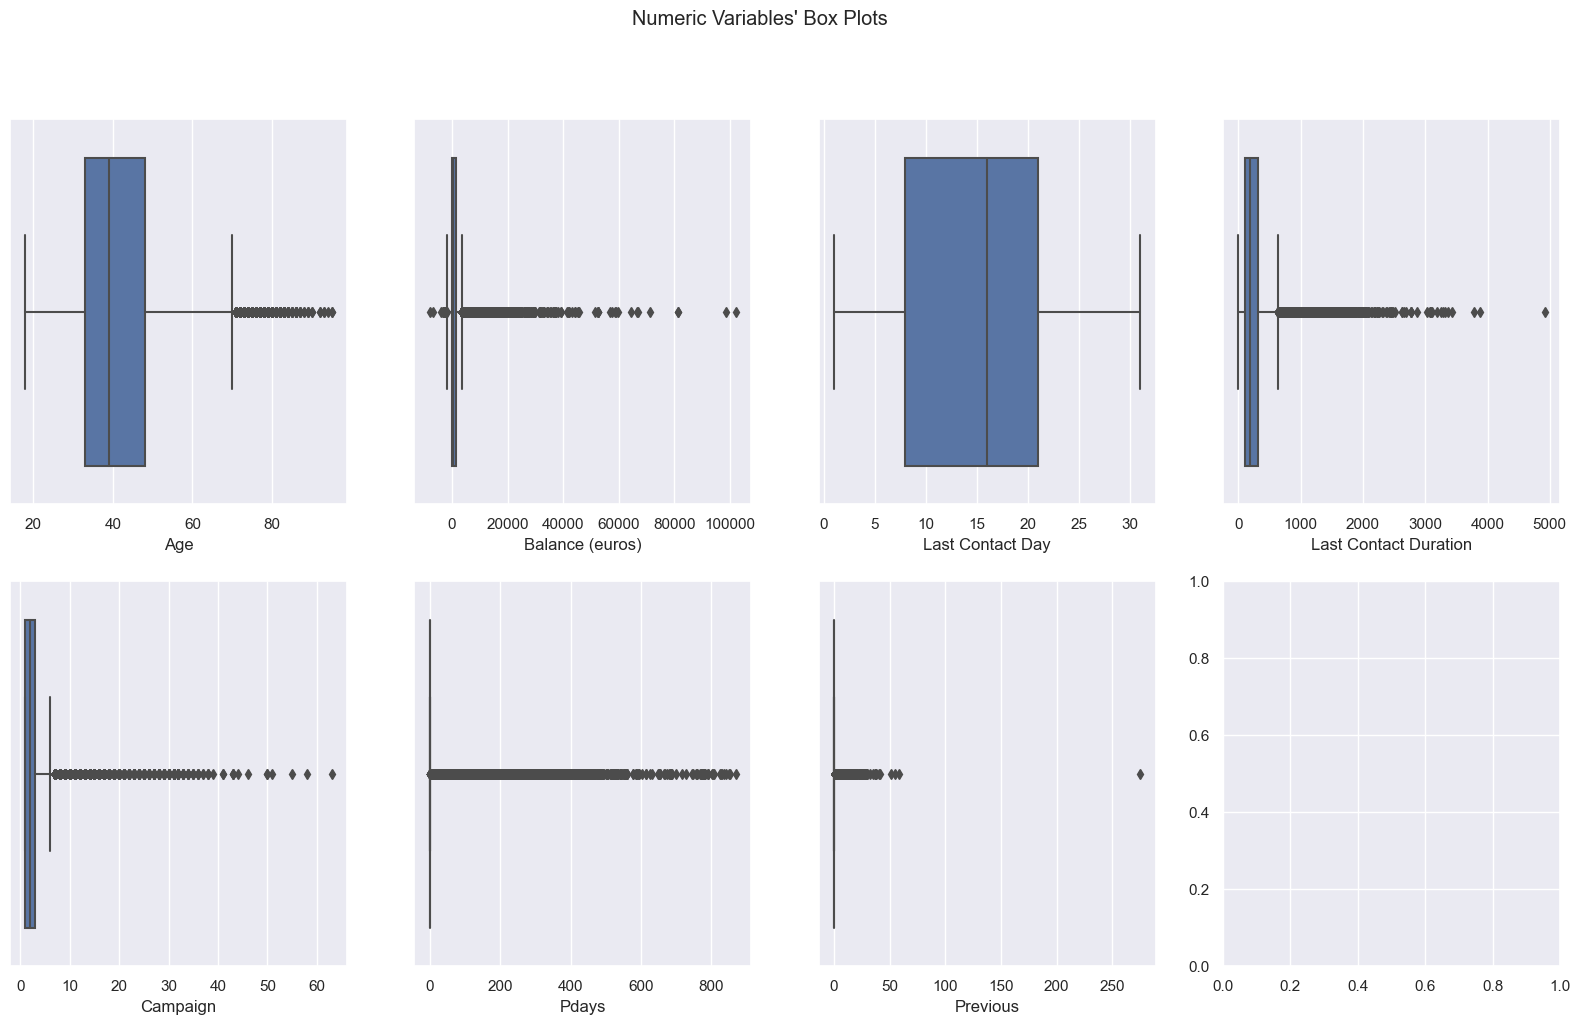

In [60]:
boxplot_wall()

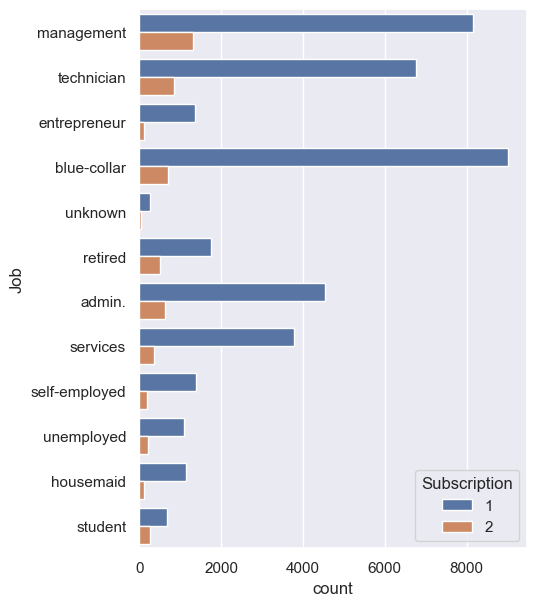

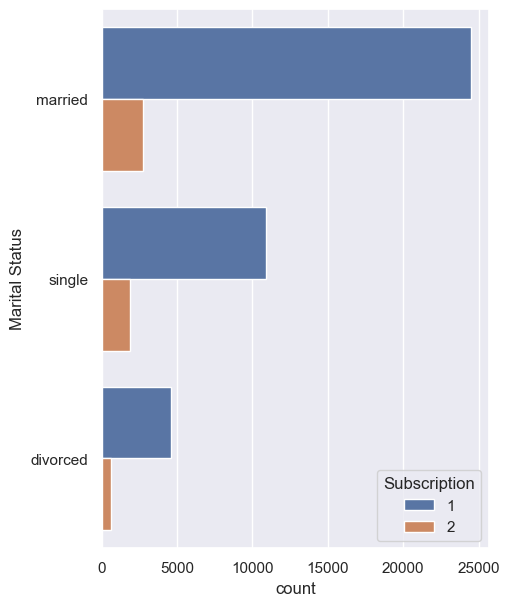

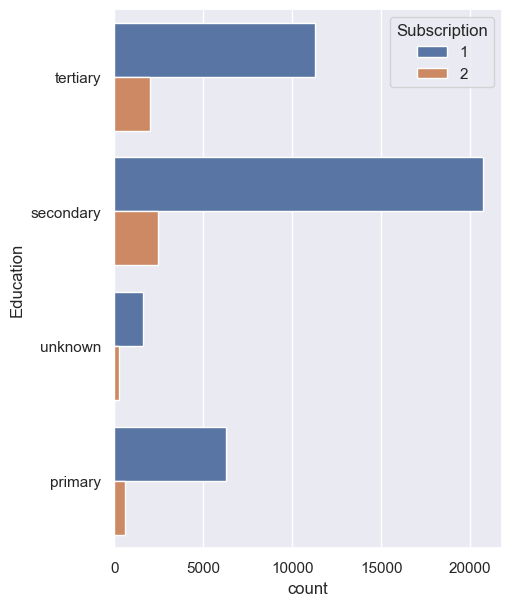

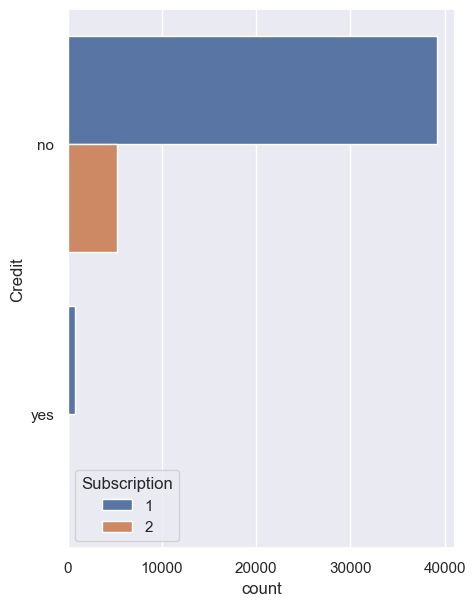

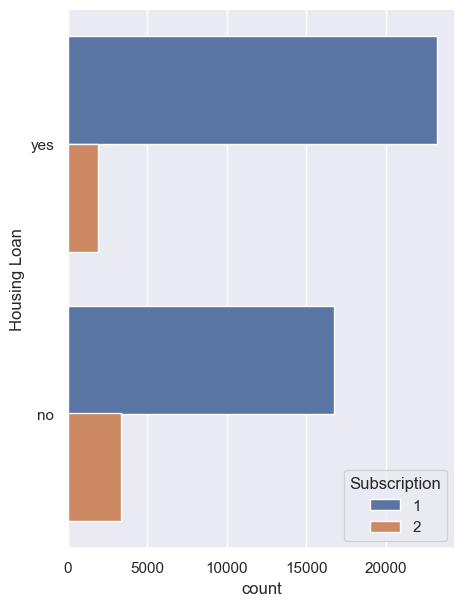

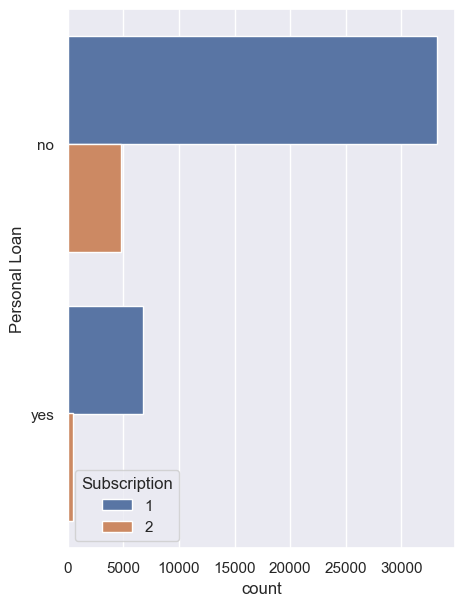

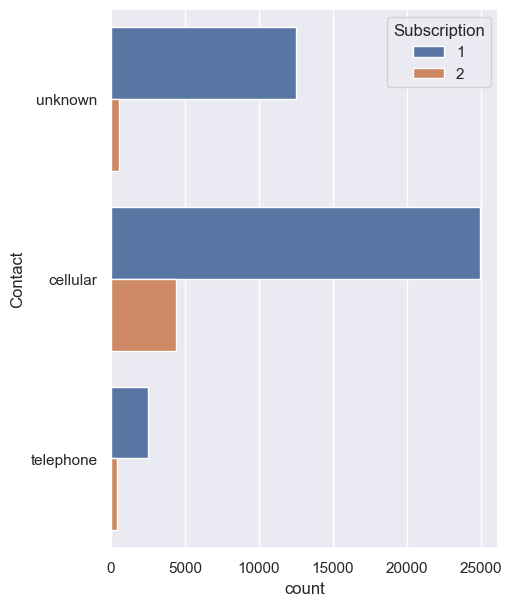

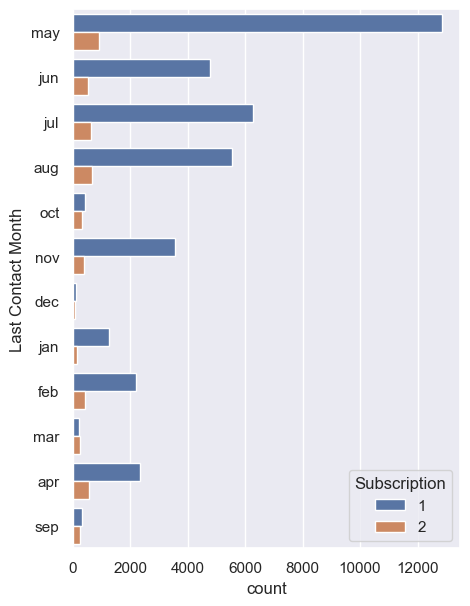

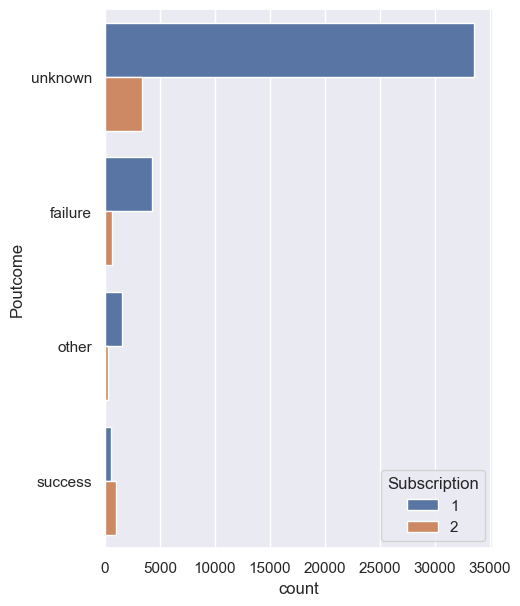

In [66]:
#AFONSO

# Vizualization of Categorical variable's barplots with binary discrimination
for i, var in enumerate(categ):
    plt.figure(figsize = (5,7), dpi = 100)
    sns.countplot(data = df, y = var, hue = "Subscription", orient = "v")
    plt.show()

In [70]:
#AFONSO

def iqr(df):
    q25 = df.quantile(.25)
    q75 = df.quantile(.75)
    iqr = (q75 - q25)

    upper_lim = q75 + 2 * iqr
    lower_lim = q25 - 2 * iqr

    filters2 = []
    for metric in num:
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        filters2.append((df[metric].between(llim, ulim, inclusive=True)) | (df[metric].isna()))

    filters2 = pd.Series(np.all(filters2, 0))
    filters2.index = df.index

    print("IQRThe % of deleted rows in the dataset is of", (len(df) - sum(filters2))/len(df) *100, "%.")
    df = df.loc[filters2]
    return df

In [107]:
#AFONSO

#manual filter
def outlier_filter_manual(df):
    filters = ((df["Last Contact Duration"] < 50)& 
              (df["Last Contact Duration"] < 50) &
              (df.Campaign < 40) &
              (df["Balance (euros)"] < 23000) &
               (df.Previous < 20))
    
    df_filter=df[filters]
    print("Manual: The % of deleted rows in the dataset is of", len(df_filter)/len(df) *100, "%.")
    return df_filter

In [91]:
#AFONSO
df_iqr = iqr(df)
df_manual = outlier_filter_manual(df)

The % of deleted rows in the dataset is of 33.06717391785185 %.
The % of deleted rows in the dataset is of 7.708301077171485 %.


In [105]:
df.loc[df["Previous"] < 10]

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,1
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,2
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,1
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,2
24122,26,technician,single,tertiary,no,172,no,yes,telephone,4,nov,21,1,140,4,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,1
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,2
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,2


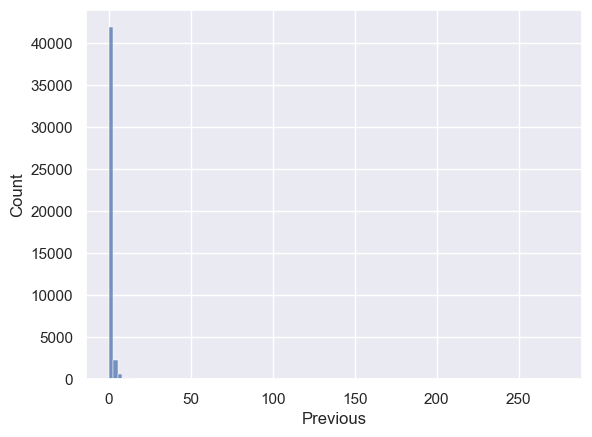

In [119]:
sns.histplot(df["Previous"], bins=100)
plt.show()

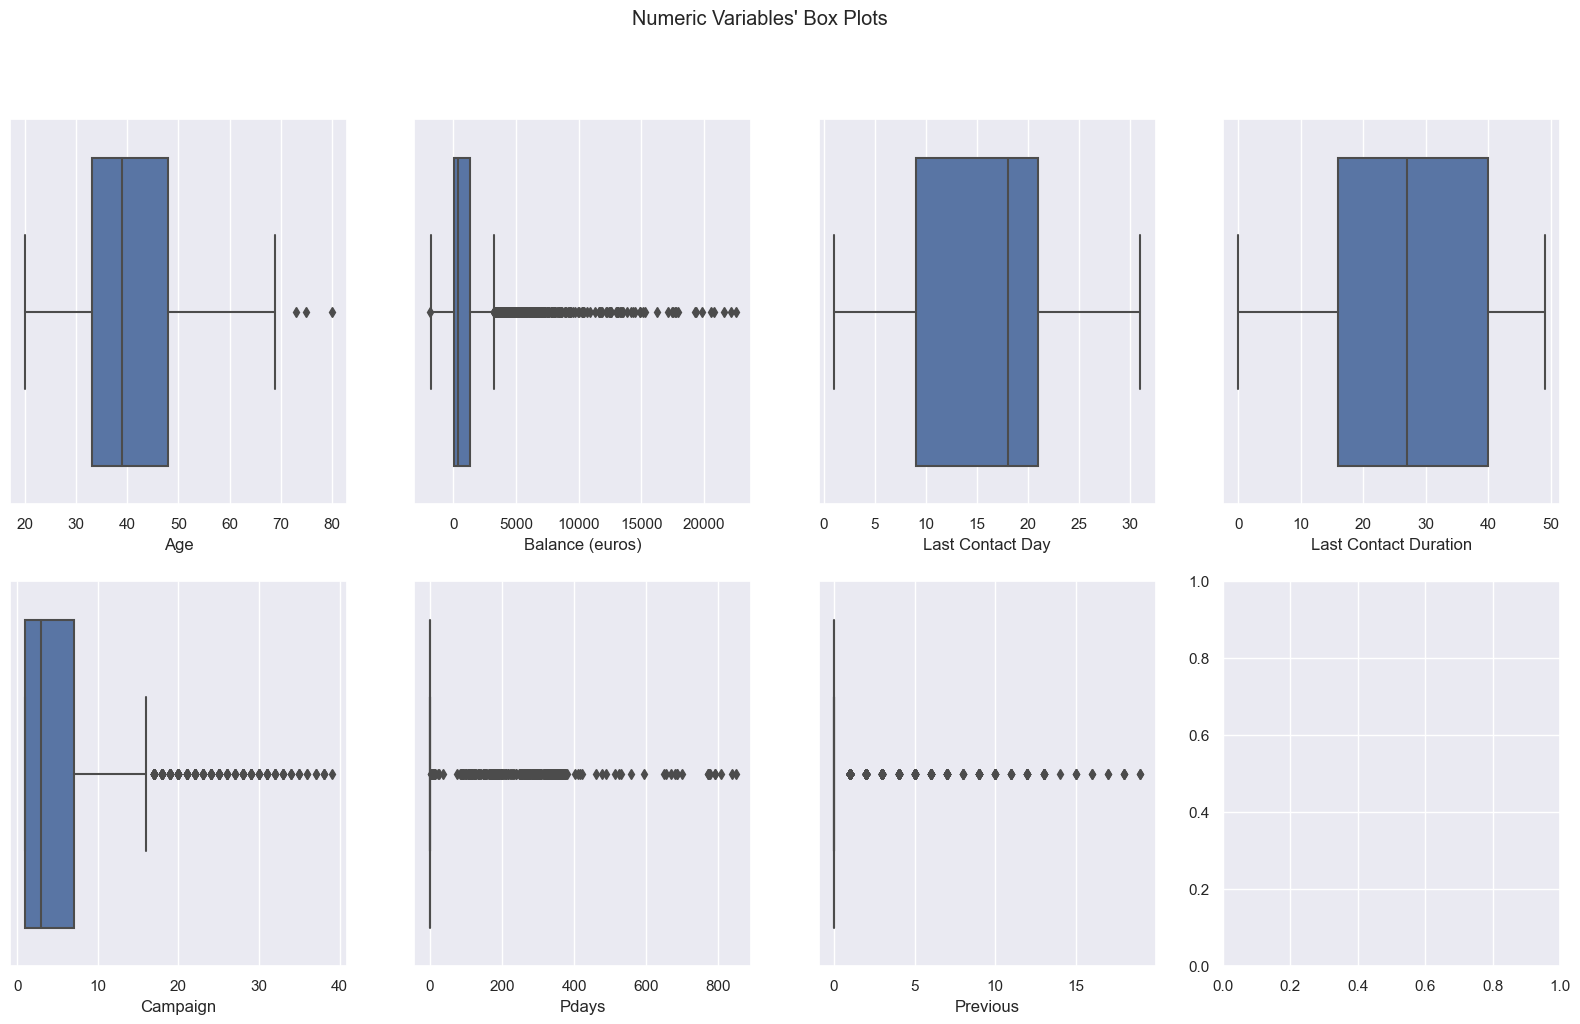

In [109]:
#Afonso

boxplot_wall(df_manual)

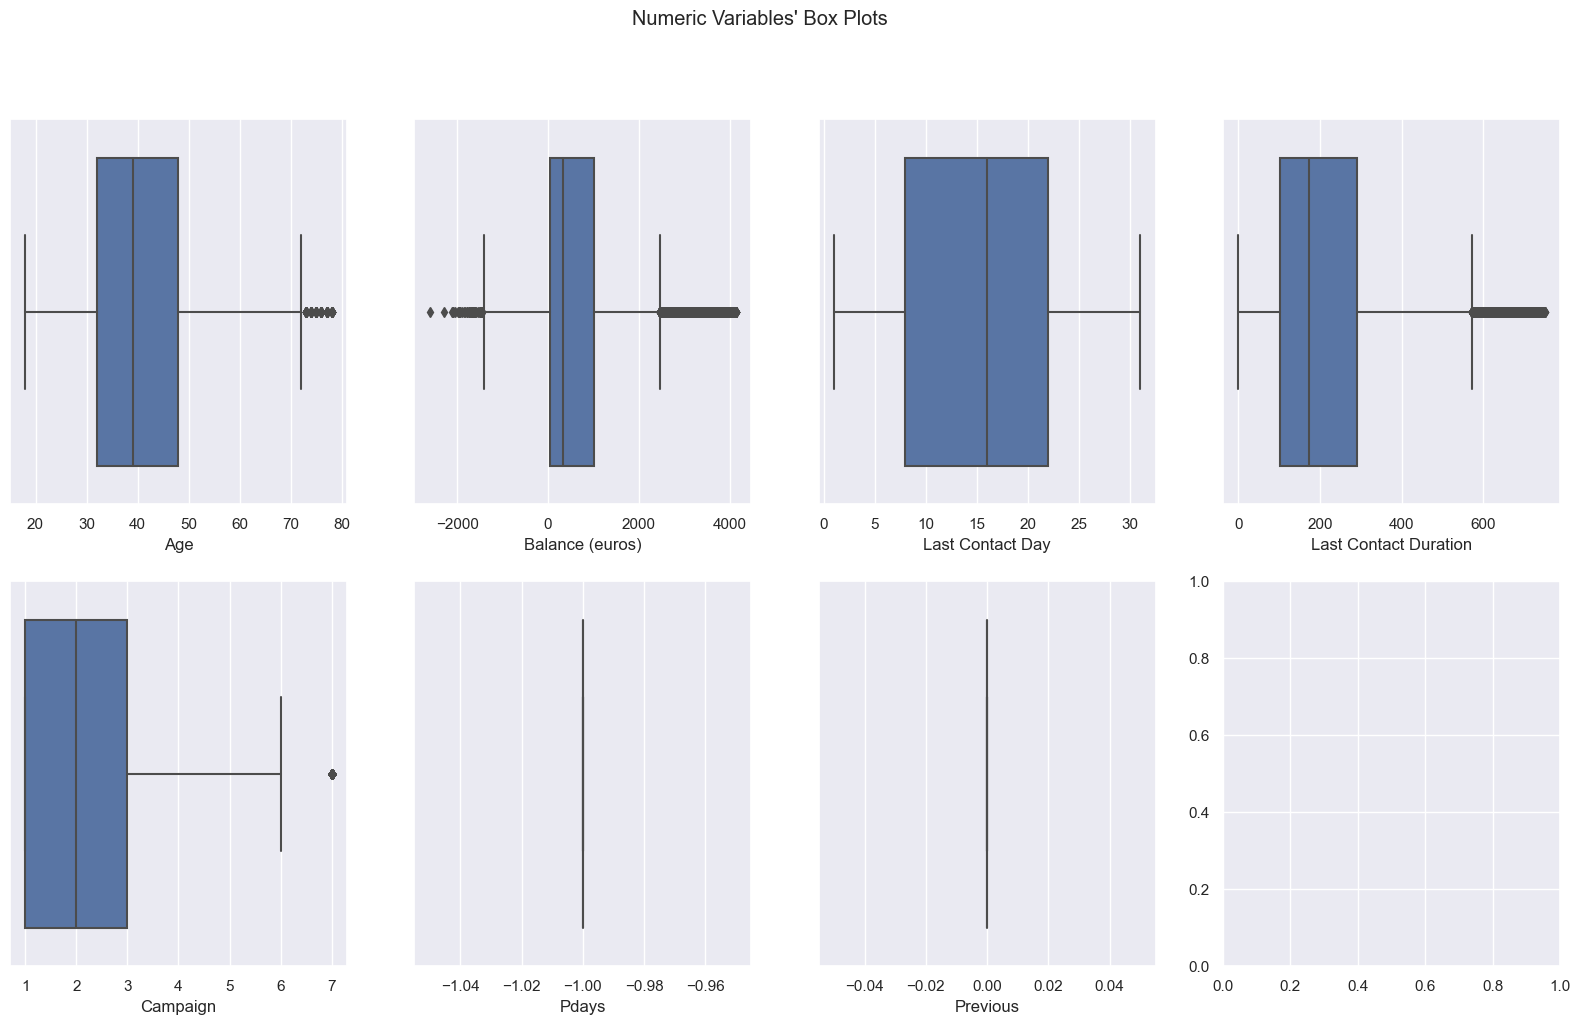

In [76]:
#AFONSO

boxplot_wall(df_iqr)

In [36]:
df["Subscription"].value_counts()[2]/df["Subscription"].value_counts()[1]

0.1324833425179099

In [10]:
df.isna().sum()

Age                      0
Job                      0
Marital Status           0
Education                0
Credit                   0
Balance (euros)          0
Housing Loan             0
Personal Loan            0
Contact                  0
Last Contact Day         0
Last Contact Month       0
Last Contact Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Poutcome                 0
Subscription             0
dtype: int64

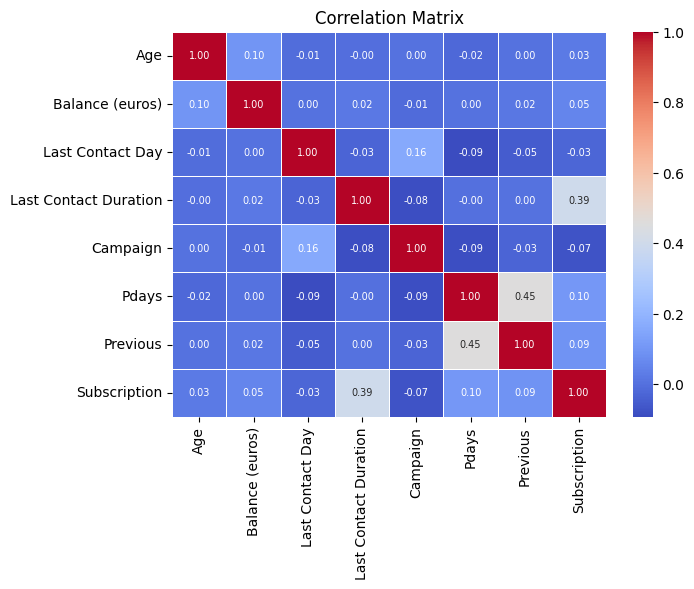

In [11]:
# Assuming your dataset is stored in a variable called 'df'
# Select the numerical columns for correlation analysis
numerical_cols = ['Age', 'Balance (euros)', 'Last Contact Day', 'Last Contact Duration',
                  'Campaign', 'Pdays', 'Previous', 'Subscription']
# Create a subset DataFrame with only the numerical columns
numerical_df = df[numerical_cols]
# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            annot_kws={"fontsize": 7}, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title("Correlation Matrix")
plt.show()

In [12]:
# Separate the target variable from the dataset
X = df.drop('Subscription', axis=1)
y = df['Subscription']

cat_features = ["Job", "Marital Status", "Education", "Credit", "Housing Loan", "Personal Loan", "Contact", "Last Contact Month", "Poutcome"]
metric_features = ["Age", "Balance (euros)", "Last Contact Day", "Last Contact Month", "Last Contact Duration", "Campaign", "Pdays", "Previous"]

# Split the data into train and test sets. Use stratification.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
X_train

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome
24001,36,technician,divorced,secondary,no,861,no,no,telephone,29,aug,140,2,-1,0,unknown
43409,24,student,single,secondary,no,4126,no,no,cellular,5,apr,907,4,185,7,failure
20669,44,technician,single,secondary,no,244,yes,no,cellular,12,aug,1735,4,-1,0,unknown
18810,48,unemployed,married,secondary,no,0,no,no,telephone,31,jul,35,11,-1,0,unknown
23130,38,technician,married,secondary,no,257,no,no,cellular,26,aug,57,10,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17958,50,blue-collar,married,secondary,no,917,yes,no,cellular,30,jul,58,2,-1,0,unknown
15941,36,admin.,single,secondary,no,22,yes,no,cellular,22,jul,77,5,-1,0,unknown
16952,45,blue-collar,married,secondary,no,79,yes,no,cellular,25,jul,98,1,-1,0,unknown
34781,27,management,single,tertiary,no,2559,yes,no,cellular,6,may,227,1,-1,0,unknown


In [14]:
# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=cat_features)

# Split the encoded data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Create and fit the random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#rf = RandomForestClassifier(n_estimators=100, max_depth=6, max_features=3)
#rf = DecisionTreeClassifier( max_depth=6, max_features=3)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


In [15]:
cm

array([[7758,  227],
       [ 638,  420]])

In [16]:
mlflow.set_experiment("Bank_Experiment_class")
mlflow.set_tracking_uri("http://localhost:5000")


2023/06/12 09:39:35 INFO mlflow.tracking.fluent: Experiment with name 'Bank_Experiment_class' does not exist. Creating a new experiment.


In [9]:
df.describe().to_dict()

{'Age': {'count': 45211.0,
  'mean': 40.93621021432837,
  'std': 10.61876204097542,
  'min': 18.0,
  '25%': 33.0,
  '50%': 39.0,
  '75%': 48.0,
  'max': 95.0},
 'Balance (euros)': {'count': 45211.0,
  'mean': 1362.2720576850766,
  'std': 3044.765829168518,
  'min': -8019.0,
  '25%': 72.0,
  '50%': 448.0,
  '75%': 1428.0,
  'max': 102127.0},
 'Last Contact Day': {'count': 45211.0,
  'mean': 15.80641879188693,
  'std': 8.322476153044592,
  'min': 1.0,
  '25%': 8.0,
  '50%': 16.0,
  '75%': 21.0,
  'max': 31.0},
 'Last Contact Duration': {'count': 45211.0,
  'mean': 258.1630797814691,
  'std': 257.5278122651719,
  'min': 0.0,
  '25%': 103.0,
  '50%': 180.0,
  '75%': 319.0,
  'max': 4918.0},
 'Campaign': {'count': 45211.0,
  'mean': 2.763840658246887,
  'std': 3.0980208832791694,
  'min': 1.0,
  '25%': 1.0,
  '50%': 2.0,
  '75%': 3.0,
  'max': 63.0},
 'Pdays': {'count': 45211.0,
  'mean': 40.19782796222158,
  'std': 100.12874599059835,
  'min': -1.0,
  '25%': -1.0,
  '50%': -1.0,
  '75%': -

In [17]:
with mlflow.start_run(run_name="check_verify_data") as run:
    
    mlflow.set_tag("mlflow.runName", "check_verify_data")
    
    describe_to_dict=df.describe().to_dict()
    mlflow.log_dict(describe_to_dict,"describe_data_raw.json")

    #Here I start to build suit to data using Great Expectations
    pd_df_ge = ge.from_pandas(df)
    assert pd_df_ge.expect_column_values_to_be_of_type("duration", "int64").success == True
    assert pd_df_ge.expect_column_values_to_be_of_type("marital", "str").success == True
    assert pd_df_ge.expect_table_column_count_to_equal(23).success == True



    #remove some outliers
    for cols in ["age"]:
        Q1 = df[cols].quantile(0.25)
        Q3 = df[cols].quantile(0.75)
        IQR = Q3 - Q1     

    filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df_full = df.loc[filter]
    
    #we can do some basic cleaning by impuation of all null values
    df_full.fillna(-9999,inplace=True)
    #if data_passes_quality_can_go_to_features:
    df_full.to_csv("data_verified.csv",index=False)
    describe_to_dict=df_full.describe().to_dict()
    
    mlflow.log_dict(describe_to_dict,"describe_data_cleaned.json")
mlflow.end_run()

MlflowException: API request to endpoint /api/2.0/mlflow/runs/create failed with error code 403 != 200. Response body: ''

In [ ]:
# descrition that will be used as metadata
description = "the simplest possible example"

# Mlflow tracking server
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [ ]:
# executes the run
with mlflow.start_run(run_name="tracking experiment_1", description=description) as run:
    rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)
    rf.fit(X_train, y_train)
mlflow.end_run()


MlflowException: ignored